<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/1109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])

In [4]:
df.loc[0]=[1200, 1, 0, 0, 2, 'Skinny']
df.loc[1]=[2800, 1, 1, 1, 1, 'Normal']
df.loc[2]=[3500, 2, 2, 1, 0, 'Fat']
df.loc[3]=[1400, 0, 1, 0, 3, 'Skinny']
df.loc[4]=[5000, 2, 2, 2, 0, 'Fat']
df.loc[5]=[1300, 0, 0, 1, 2, 'Skinny']
df.loc[6]=[3000, 1, 0, 1, 1, 'Normal']
df.loc[7]=[4000, 2, 2, 2, 0, 'Fay']
df.loc[8]=[2600, 0, 2, 0, 0, 'Normal']
df.loc[9]=[3000, 1, 2, 1, 1, 'Fat']

In [5]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fay
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [6]:
X=df[['calory','breakfast','lunch','dinner','exercise']]

In [7]:
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [8]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [9]:
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


In [10]:
Y=df[['body_shape']]

In [11]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fay
8,Normal
9,Fat


In [12]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

In [13]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [17]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [18]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [19]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

In [22]:
projected_X = -x_std.dot(eig_vecs.T[0])/np.linalg.norm(eig_vecs.T[0])

In [23]:
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [24]:
result = pd.DataFrame(projected_X,columns=['PC1'])
result['y-axis']=0.0
result['label']=Y

In [25]:
result.head(10)

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fay
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

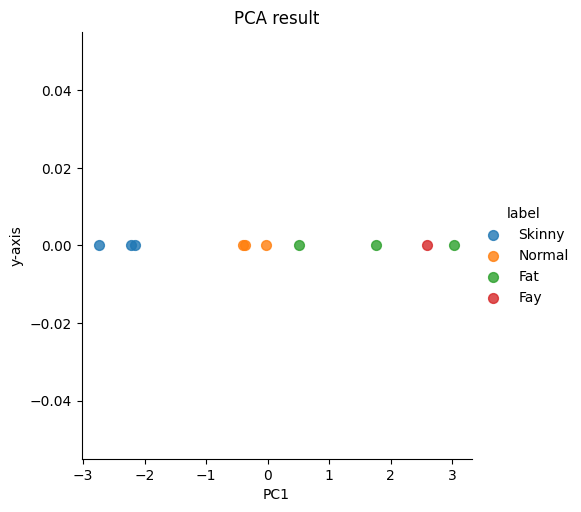

In [32]:
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False,
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

plt.title('PCA result')